# MNIST
Here we will be using keras for digit recognition. We will be using MNIST as our training data for our neural network and then we will test the data and display the results. 

We will be using numpy to get and store the bytes in an array then we will be using keras to train our neural network.

First we take the files taken from:(http://yann.lecun.com/exdb/mnist/) using gzip which is a module that provides open(), compress() and decompress() convenience functions. The GzipFile class reads and writes gzip-format files, automatically compressing or decompressing the data so that it looks like an ordinary file object.

Using numpy we convert the files to a 2D array then reshape it to 28X28 every 784 bytes after the first 16 as unsigned intergers using np.uint8.

In [2]:
# For unzipping the file within the script.
import gzip
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content_images = f.read()
    
# For unzipping the file within the script.
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    file_content_labels = f.read()

import numpy as np
image = ~np.array(list(file_content_images[16:800])).reshape(28,28).astype(np.uint8)

with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()
    
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8)/255.0
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

![title](https://www.inria.fr/var/inria/storage/images/medias/actualites/generales/images-chapo/scikit-learn-chapo/1870065-1-fre-FR/scikit-learn-chapo_vignette.png)
Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

In [3]:
# For encoding categorical variables and pre processing.
import sklearn.preprocessing as pre

encoder = pre.LabelBinarizer()
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

outputs[0]

inputs = train_img.reshape(60000, 784)

# Model
There are 6 hidden layers made with a dropout layer running sequentially.

The model takes in the 28X28 array of 784 where each pixel is a number ranging from 0 to 1 where 0 is black and 1 is white. Each one of these pixels is considered a neuron and passed into the neural network where the greyscale value is the weight.

![title](https://achintavarna.files.wordpress.com/2017/11/mnist_2layers.png)


![title](https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png)

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

In [4]:
# ------- MODEL -------
# Import keras.
import keras as kr
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dropout 

# Start a neural network, building it by layers.
model = kr.models.Sequential()
# Add a hidden layer with 784 neurons.
model.add(kr.layers.Dense(units=784, activation='relu', input_dim=784))
# Add a hidden layer with 455 neurons.
model.add(kr.layers.Dense(units=455, activation='relu'))
# Add a hidden layer with 250 neurons.
model.add(kr.layers.Dense(units=250, activation='relu'))
# Add a hidden layer with 170 neurons.
model.add(kr.layers.Dense(units=170, activation='softplus'))
# Add a hidden layer with 120 neurons.
model.add(kr.layers.Dense(units=120, activation='linear'))
# Add a hidden layer with 50 neurons.
model.add(kr.layers.Dense(units=50, activation='relu'))
# Add a dropout layer every 1 in 5.
model.add(Dropout(0.2))

# Add a three neuron output layer.
model.add(kr.layers.Dense(units=10, activation='softmax'))

C:\Users\niall\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 455)               357175    
_________________________________________________________________
dense_3 (Dense)              (None, 250)               114000    
_________________________________________________________________
dense_4 (Dense)              (None, 170)               42670     
_________________________________________________________________
dense_5 (Dense)              (None, 120)               20520     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                6050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
__________

# Training the neural network
Here we are traing the neural network with the data set. The model.fit() function is the function that trains the network itself we are passing in the arrays and and expected outputs along with the number of epochs and batch size.

In [5]:
# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Number of Epoch is the amount of times the training set is put through the model
# The batch size is the amount of images the models processes at one time
model.fit(inputs, outputs, epochs=10, batch_size=100)

with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
    
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8) / 255.0
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

Epoch 1/10
60000/60000 [==============================] - 25s 413us/step - loss: 0.6963 - acc: 0.7718
Epoch 2/10
60000/60000 [==============================] - 23s 386us/step - loss: 0.3061 - acc: 0.9100
Epoch 3/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.2313 - acc: 0.9317
Epoch 4/10
60000/60000 [==============================] - 22s 371us/step - loss: 0.1917 - acc: 0.9437
Epoch 5/10
60000/60000 [==============================] - 23s 382us/step - loss: 0.1692 - acc: 0.9499
Epoch 6/10
60000/60000 [==============================] - 24s 399us/step - loss: 0.1496 - acc: 0.9559
Epoch 7/10
60000/60000 [==============================] - 27s 445us/step - loss: 0.1327 - acc: 0.9604
Epoch 8/10
60000/60000 [==============================] - 24s 400us/step - loss: 0.1263 - acc: 0.9624
Epoch 9/10
60000/60000 [==============================] - 23s 388us/step - loss: 0.1157 - acc: 0.9654
Epoch 10/10
60000/60000 [==============================] - 23s 391us/step - loss: 

In [6]:
# Tests prints the sum of correct predictions out of the 10,000 test images.
print((encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum())

9679


## Performance review
As we can see the neural network predicting 96% of the digits correctly which is not bad. Due to human error (and poor penmanship) some samples of data are very difficult to read by human standards. Due to the nature of this model if we were to run more epochs on the training data we could reach an accuracy of approximately 98% but this is time consuming and require processing power.

While experimenting with different activation functions and layers within the model I found that the relu function provides the fastest training but doesn't do well once it has passed 3 or 4 epochs so I experimented with a mixture of activation functions and tailoring the model to the score that was acceptable.

Looking at the plot below it is hard to determine that it somewhat resembles a 5. Recognising these sort of images is one of the main challenges faced when dealing with handwriting recognition.

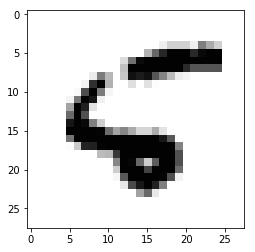

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
image_array = np.frombuffer(file_content_images, dtype = np.uint8, offset = 16)

image_array = image_array.reshape(10000, 28, 28)

plt.imshow(~image_array[8], cmap="gray")

# Addtional functions 
#### Option 1 
Allows the user to train the neural network again.

#### Option 2
Allows the user to input their own image as long as it contained within the images folder and have given the correct name of the image. The package Pillow allows us to open images within the script we first resize the image to the size of the inputs we want 28X28 (784) then convert this image to a 2D array and pass it into the the neural network. The pictures I have supplied are from the original NIST dataset.

#### Option 3
Allows the user to train the neural network with in a number of epochs and batch size supplied by the user.

All of these are contained within a while loop which will loop over until 0 is entered to exit.

In [ ]:
def retrainNN():
    model.fit(inputs, outputs, epochs=10, batch_size=100)
    print((encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum())

def trainNNCustom(numEpc, btchSz):
    model.fit(inputs, outputs, epochs=numEpc, batch_size=btchSz)
    print((encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum())
    
def importImage():
    imageName = input("Enter the file name: ")
    # use the file hsf_7_00003 for 4 or hsf_4_00016 for 5
    userInput = input("Enter the label for the image uploaded: ")
    print("The label for this image is: ", userInput)
    # Used to open image file using pillow
    from PIL import Image
    temp = Image.open("Images/" + imageName + ".png").convert('L')
    # Convert to a 1 dimensioanl array with 784 nodes
    temp = temp.resize((28, 28))
    imgArray = np.array(temp)
    # converts the array to a a 1D array of 784 nodes
    imgArray = imgArray.reshape(1, 784)

    prediction = model.predict(imgArray)
    print("Prediction: ", prediction.argmax(axis=1))
    
option =int(input("1 to retrain model: \n2 to read an image: \n3 to train the neural netork with custom epochs and batch size \n0 to Quit:"))
while option != 0:
    if option==1:
        retrainNN()
        option = input("1 to retrain model: \n2 to read an image: \n3 to train the neural netork with custom epochs and batch size \n 0 to Quit:")
    elif option==2:
        importImage()
        option = input("1 to retrain model: \n2 to read an image: \n3 to train the neural netork with custom epochs and batch size \n 0 to Quit:")
    elif option==3:
        numEpc = input("Enter the number of epochs: ")
        btchSz = input("Enter batch size: ")
        trainNNCustom(int(numEpc), int(btchSz))
        option = input("1 to retrain model: \n2 to read an image: \n3 to train the neural netork with custom epochs and batch size \n 0 to Quit:")
    elif option == 0:
        exit()

1 to retrain model: 
2 to read an image: 
3 to train the neural netork with custom epochs and batch size 
0 to Quit:2
Enter the file name: hsf_7_00003
Enter the label for the image uploaded: 4
The label for this image is:  4
Prediction:  [4]
1 to retrain model: 
2 to read an image: 
3 to train the neural netork with custom epochs and batch size 
 0 to Quit:0


# References 
Gzip: https://docs.python.org/3/library/gzip.html

scikit-learn: https://scikit-learn.org/stable/modules/preprocessing.html

Keras: https://keras.io/

# End